# Explore dogeprice data downloaded from internet

In [1]:
%load_ext autoreload
%autoreload 2

import src.data_utils.loaders as loaders
import src.config.config as config
import pandas as pd
import matplotlib.pyplot as plt


## Load data

Source is described in README.md.

In [2]:
dogecoin_price_df = loaders.load_data(
    config.RAW_DIR,
    config.RAW_DOGE_PRICE_PATH,
    types=config.DOGE_DTYPES,
    separator=config.CSV_SEPARATOR_DOGEUSDT,
)
print(f"Initial loaded: {len(dogecoin_price_df)} rows.")

Initial loaded: 3358599 rows.


In [3]:
dogecoin_price_df.info()

print("\nEmpty counts of features:")

print(dogecoin_price_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3358599 entries, 0 to 3358598
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     Int64  
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   taker_buy_quote_asset_volume  float64
 7   taker_buy_base_asset_volume   float64
 8   quote_asset_volume            float64
 9   number_of_trades              Int32  
dtypes: Int32(1), Int64(1), float64(8)
memory usage: 249.8 MB

Empty counts of features:
timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
taker_buy_quote_asset_volume    0
taker_buy_base_asset_volume     0
quote_asse

The dataset rows are complete with no missing values, as the data was gathered from a single API source.

In [4]:
dogecoin_price_df.describe()

,timestamp,open,high,low,close,volume,taker_buy_quote_asset_volume,taker_buy_base_asset_volume,quote_asset_volume,number_of_trades
count,3358599.0,3.358599e+06,3.358599e+06,3.358599e+06,3.358599e+06,3.358599e+06,3.358599e+06,3.358599e+06,3.358599e+06,3358599.0
mean,1663237024.907475,1.158288e-01,1.159515e-01,1.157047e-01,1.158289e-01,1.255960e+06,9.991535e+04,6.229465e+05,2.014908e+05,412.703854
std,58214504.793675,1.044774e-01,1.046360e-01,1.043171e-01,1.044775e-01,4.990099e+06,4.541298e+05,2.547006e+06,8.948899e+05,1164.631429
min,1562328000.0,1.145400e-03,1.148800e-03,1.134500e-03,1.148800e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1612826730.0,4.961310e-02,4.971215e-02,4.951435e-02,4.961280e-02,8.804600e+04,8.510000e+02,2.434500e+04,2.974000e+03,16.0
50%,1663265280.0,8.454000e-02,8.460000e-02,8.449000e-02,8.454000e-02,3.323870e+05,1.321300e+04,1.457540e+05,3.071400e+04,92.0
75%,1713649050.0,1.724000e-01,1.725200e-01,1.722400e-01,1.724000e-01,9.522800e+05,5.768820e+04,4.655220e+05,1.206275e+05,357.0
max,1764028020.0,7.376800e-01,7.399500e-01,7.341300e-01,7.380500e-01,6.184198e+08,5.622390e+07,2.876800e+08,1.418261e+08,144249.0


The timestamp range is valid, with reasonable minimum and maximum values. Furthermore, all price values are non negative, which is a positive indicator of data integrity.

In [5]:
dogecoin_price_df.head()

,timestamp,open,high,low,close,volume,taker_buy_quote_asset_volume,taker_buy_base_asset_volume,quote_asset_volume,number_of_trades
0,1562328000,0.00449,0.004600,0.003760,0.004200,60726008.0,175346.0,40516981.0,259378.0,521
1,1562328060,0.00420,0.004387,0.004200,0.004300,84307704.0,173855.0,40173084.0,363011.0,561
2,1562328120,0.00430,0.004475,0.004300,0.004475,48182744.0,144634.0,33036098.0,210232.0,291
3,1562328180,0.00445,0.004450,0.004169,0.004250,66457853.0,35933.0,8266236.0,285858.0,289
4,1562328240,0.00425,0.004385,0.004250,0.004350,22016425.0,43020.0,9954068.0,95311.0,179


## Missing values - time gaps

In [ ]:
def print_number(number):
    return f"{number:_}".replace("_", " ")


min_val = dogecoin_price_df["timestamp"].min()
max_val = dogecoin_price_df["timestamp"].max()
actual_count = len(dogecoin_price_df)

duration_seconds = int(max_val - min_val) + 60
expected_count = duration_seconds // 60
missing_rows = abs(actual_count - expected_count)

start_dt = pd.to_datetime(min_val, unit="s")
end_dt = pd.to_datetime(max_val, unit="s")

print("--- Data Integrity Check ---")
print(f"Start Time:      {start_dt}")
print(f"End Time:        {end_dt}")
print(
    f"Total Duration:  {print_number(duration_seconds)} seconds ({print_number(duration_seconds / 3600)} hours)"
)
print("-" * 35)
print(f"Expected Rows:   {print_number(expected_count)}")
print(f"Actual Rows:     {print_number(actual_count)}")
print(f"Missing Rows:    {print_number(missing_rows)}")


print(f"Warning: Dataset has {missing_rows} missing minute(s).")

--- Data Integrity Check ---
Start Time:      2019-07-05 12:00:00
End Time:        2025-11-24 23:47:00
Total Duration:  201 700 080 seconds (56 027.8 hours)
-----------------------------------
Expected Rows:   3 361 668
Actual Rows:     3 358 599
Missing Rows:    3 069


In [7]:
# display(dogecoin_price_df.iloc[58438:58442])

## Print missing values

In [8]:
expected_range = pd.RangeIndex(
    start=dogecoin_price_df["timestamp"].min(),
    stop=dogecoin_price_df["timestamp"].max() + 60,
    step=60,
)
missing_values = pd.Series(expected_range.difference(dogecoin_price_df["timestamp"]))

gaps = (missing_values.diff() != 60).cumsum()

outage_summary = missing_values.groupby(gaps).agg(
    start_timestamp="min", end_timestamp="max", missing_intervals="count"
)

outage_summary["duration_minutes"] = outage_summary["missing_intervals"]
outage_summary["duration_seconds"] = outage_summary["duration_minutes"] * 60

outage_summary["start_readable"] = pd.to_datetime(
    outage_summary["start_timestamp"], unit="s"
)
outage_summary["end_readable"] = pd.to_datetime(
    outage_summary["end_timestamp"], unit="s"
)

outage_summary = outage_summary[["start_readable", "end_readable", "duration_minutes"]]

print(outage_summary)

        start_readable        end_readable  duration_minutes
1  2019-08-15 02:00:00 2019-08-15 09:59:00               480
2  2019-11-13 02:00:00 2019-11-13 04:19:00               140
3  2019-11-13 05:30:00 2019-11-13 05:32:00                 3
4  2019-11-25 02:00:00 2019-11-25 03:59:00               120
5  2020-02-09 02:00:00 2020-02-09 02:59:00                60
6  2020-02-19 11:36:00 2020-02-19 17:29:00               354
7  2020-03-04 09:22:00 2020-03-04 11:29:00               128
8  2020-04-25 02:00:00 2020-04-25 04:29:00               150
9  2020-06-28 02:00:00 2020-06-28 05:29:00               210
10 2020-11-30 06:00:00 2020-11-30 06:59:00                60
11 2020-12-21 14:09:00 2020-12-21 17:59:00               231
12 2020-12-25 02:00:00 2020-12-25 02:59:00                60
13 2021-02-11 03:41:00 2021-02-11 04:59:00                79
14 2021-03-06 02:00:00 2021-03-06 03:29:00                90
15 2021-04-20 02:00:00 2021-04-20 04:29:00               150
16 2021-04-25 04:01:00 2

The missing data occurs in large contiguous blocks, likely coinciding with Binance server failures. Investigations into the final gaps in the dataset point to a documented Binance outage https://www.coindesk.com/business/2023/03/24/binance-temporarily-suspends-spot-trading, during which spot trading was temporarily suspended.

## Fill empty value

In [ ]:
dogecoin_filled_df = dogecoin_price_df.set_index("timestamp").reindex(expected_range)


price_cols = ["open", "high", "low", "close"]
dogecoin_filled_df[price_cols] = dogecoin_filled_df[price_cols].interpolate(
    method="linear"
)

activity_cols = [
    "volume",
    "quote_asset_volume",
    "number_of_trades",
    "taker_buy_base_asset_volume",
    "taker_buy_quote_asset_volume",
]
dogecoin_filled_df[activity_cols] = dogecoin_filled_df[activity_cols].fillna(0)

dogecoin_filled_df = dogecoin_filled_df.reset_index().rename(
    columns={"index": "timestamp"}
)


print(f"Original row count: {len(dogecoin_price_df)}")
print(f"New row count: {len(dogecoin_filled_df)}")

Original row count: 3358599
New row count: 3361668
Remaining nulls: 0


To handle missing data points, a hybrid filling strategy is applied based on the nature of the specific feature:

   * Price Columns (open, high, low, close): These are updated using linear interpolation (method='linear'). This method creates a smooth transition between the last known price before a gap and the first known price after it. This prevents artificial "price jumps" that occur with forward filling, where a static price is held until a sudden spike or drop when data resumes. Linear interpolation more accurately reflects the gradual price movements likely occurring in the broader global market during local exchange downtime.

 *   Activity Columns (volume, number_of_trades, etc.): These are populated using fillna(0). Since missing data intervals typically represent periods when the exchange was offline, no trading activity occurred. Recording zero volume and zero trades is mathematically accurate, whereas forward filling these columns would incorrectly suggest that trading activity continued during a service outage.

This dual method approach ensures price continuity while preserving the integrity of volume based metrics.

## Visualizing the price data

Graph successfully created and saved as dogeusdt_open_price.png


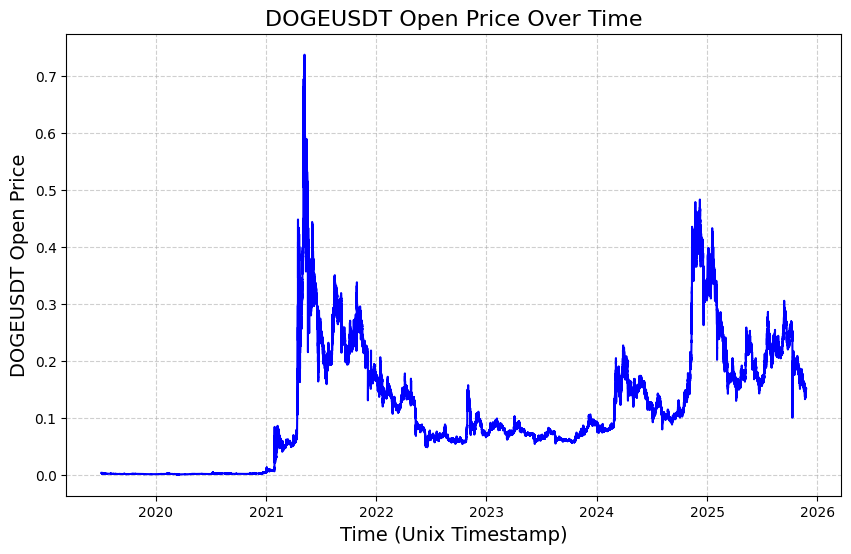

In [ ]:
def create_simple_line_graph(
    x_data, y_data, title, x_label, y_label, filename="simple_graph.png"
):
    """
    Creates and saves a simple line graph.

    :param x_data: List or array of data for the x-axis.
    :param y_data: List or array of data for the y-axis (must be the same length as x_data).
    :param title: The title of the plot.
    :param x_label: The label for the x-axis.
    :param y_label: The label for the y-axis.
    :param filename: The name of the file to save the image to.
    """

    plt.figure(figsize=(10, 6))

    plt.plot(x_data, y_data, markersize=0.005, linestyle="-", color="blue")

    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)

    plt.grid(True, linestyle="--", alpha=0.6)

    plt.savefig(filename)

    print(f"Graph successfully created and saved as {filename}")


create_simple_line_graph(
    x_data=pd.to_datetime(dogecoin_filled_df["timestamp"], unit="s"),
    y_data=dogecoin_filled_df["open"],
    title="DOGEUSDT Open Price Over Time",
    x_label="Time (Unix Timestamp)",
    y_label="DOGEUSDT Open Price",
    filename="dogeusdt_open_price.png",
)

The visualization of the full dataset aligns with the historical trends seen on Google Finance https://www.google.com/finance/quote/DOGE-USD?window=MAX, confirming the integrity of the data.

## Visualizing the price data after gap-filling

Graph successfully created and saved as dogeusdt_open_price.png


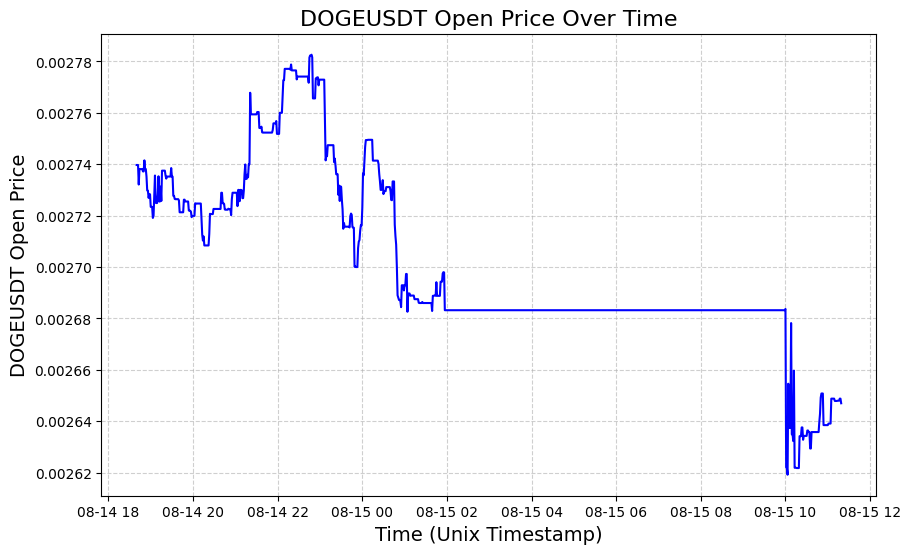

In [15]:
create_simple_line_graph(
    x_data=pd.to_datetime(dogecoin_filled_df.iloc[58000:59000]["timestamp"], unit="s"),
    y_data=dogecoin_filled_df.iloc[58000:59000]["open"],
    title="DOGEUSDT Open Price Over Time",
    x_label="Time (Unix Timestamp)",
    y_label="DOGEUSDT Open Price",
    filename="dogeusdt_open_price.png",
)

In [ ]:
loaders.save_data(
    config.PROCESSED_DIR,
    config.PROCESSED_DOGE_PRICE_PATH,
    dogecoin_filled_df,
)